# Implementation du score classiffier et du dataset 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, accuracy_score
from sklearn.svm import SVC

In [ ]:
def score_classifier(dataset,classifier,labels):

    """
    performs 3 random trainings/tests to build a confusion matrix and prints results with precision and recall scores
    :param dataset: the dataset to work on
    :param classifier: the classifier to use
    :param labels: the labels used for training and validation
    :return:
    """

    kf = KFold(n_splits=3,random_state=50,shuffle=True)
    confusion_mat = np.zeros((2,2))
    recall = 0
    for training_ids,test_ids in kf.split(dataset):
        training_set = dataset[training_ids]
        training_labels = labels[training_ids]
        test_set = dataset[test_ids]
        test_labels = labels[test_ids]
        classifier.fit(training_set,training_labels)
        predicted_labels = classifier.predict(test_set)
        confusion_mat+=confusion_matrix(test_labels,predicted_labels)
        recall += recall_score(test_labels, predicted_labels)
        recall/=3
    return confusion_mat, recall

In [ ]:
df = pd.read_csv("nba_logreg.csv")

In [ ]:
df.head(6)

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
5,Tony Bennett,75,11.4,3.7,1.5,3.5,42.3,0.3,1.1,32.5,0.4,0.5,73.2,0.2,0.7,0.8,1.8,0.4,0.0,0.7,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

In [ ]:
df.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [ ]:
names = df['Name'].values.tolist() # players names
labels = df['TARGET_5Yrs'].values # labels

In [ ]:
paramset = df.drop(['TARGET_5Yrs','Name'],axis=1).columns.values
df_vals = df.drop(['TARGET_5Yrs','Name'],axis=1).values
print(df_vals.shape)

(1340, 19)


In [ ]:
for x in np.argwhere(np.isnan(df_vals)):
    df_vals[x]=0.0

## Le dataset assez petit
donc théoriquement il faut utiliser un classificateur avec un biais élevé (par exemple, Naive Bayes).Un classificateur à biais plus élevé aura une variance plus faible, ce qui est bien en raison de la petite quantité de données.

## Vérifier le déséquilibre de classe
On vérifie si une classe domine et qu'il y a très peu d'instances de l'autre classe.Le cas écheant signifie que notre algorithme ML est exposé à très moins de cas de formation. mais ceux n'est pas le cas dans notre dataset car la différence entre les nombres de cas dans chauque class est acceptable

(array([509.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 831.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

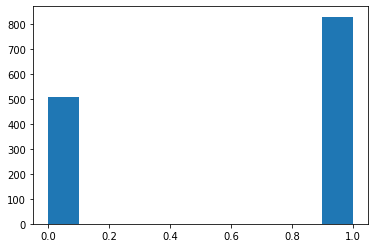

In [ ]:
plt.hist(labels)

In [ ]:
# Mise à l'échelle standard des données
X = MinMaxScaler().fit_transform(df_vals)

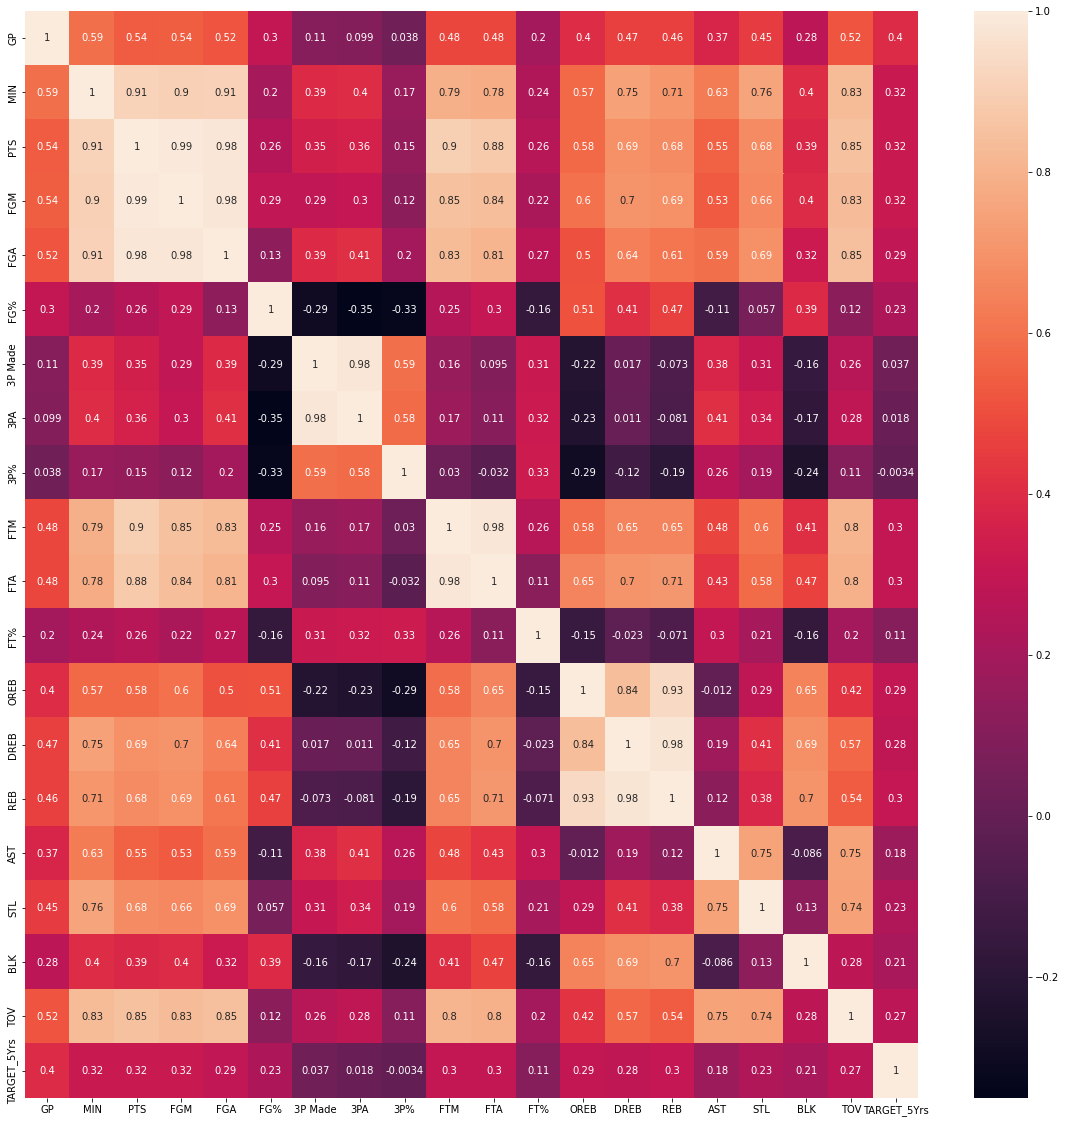

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot = True)

In [ ]:

pd.plotting.scatter_matrix(df, alpha=0.2,figsize=(30,30))

# On commence par une simple regression linéare
Cela va nous permettre de mieux comprendre notre data et la corrélation entre nos features. Dans notre cas, vu les valeurs des coefs et des d'erreurs notre data est trés defficile à etre séparer linearement 

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
x= pca.fit_transform(X)

In [ ]:
pca.explained_variance_ratio_

array([5.47845373e-01, 1.79023268e-01, 6.95825318e-02, 5.74131391e-02,
       3.18417473e-02, 2.70038305e-02, 2.21885634e-02, 1.42238768e-02,
       1.25248712e-02, 1.17097485e-02, 1.04888788e-02, 5.93867953e-03,
       4.65384151e-03, 3.85767519e-03, 9.89071989e-04, 4.07535784e-04,
       2.81737668e-04, 1.67163618e-05, 8.91446228e-06])

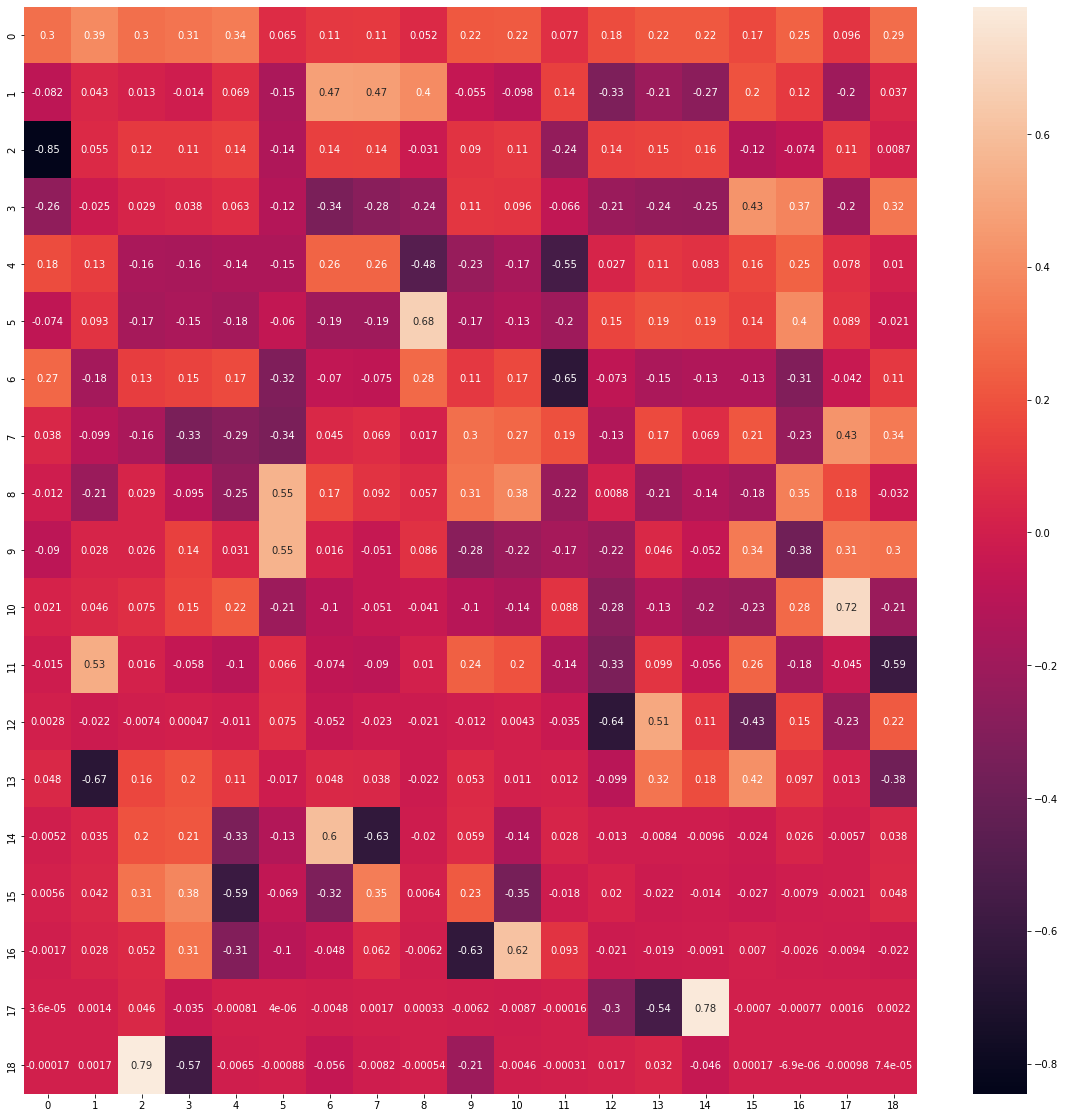

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(pca.components_, annot = True)

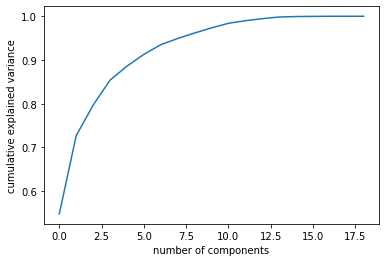

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


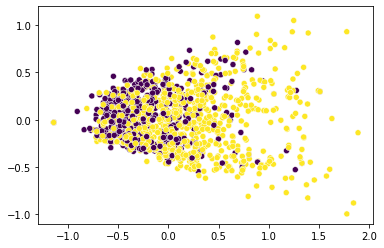

In [ ]:
sns.scatterplot(x[:,0], x[:,1], c = labels)

#  Le Test des classificateurs de base en premier


In [ ]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
score_classifier(X,lr_clf,labels)

(array([[260., 249.],
        [137., 694.]]), 0.4033097533335308)

0.38598115398961896

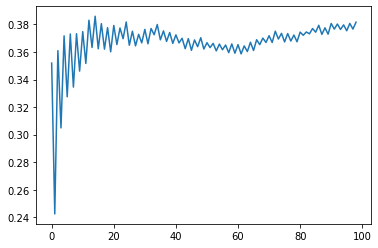

In [ ]:
#KNN classifier 
from sklearn.neighbors import KNeighborsClassifier
scores = []
for i in range(1,100):
  neigh_clf  = KNeighborsClassifier(n_neighbors=i)
  scores.append(score_classifier(X,neigh_clf,labels)[1])
plt.plot(scores)
max(scores)

In [ ]:
#Naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
mb_clf= MultinomialNB()
score_classifier(X,mb_clf,labels)

(array([[  0., 509.],
        [  0., 831.]]), 0.48148148148148145)

Pour le Moment il semble que le classfieur de bernoulli est le plus préfomant, comme était prévu, mais si on regarde la matrice de confusion on trouve que l'algorithme n'a fait que prédire des la même class pour toutes les données donc il n'est pas vraiment pérformant 



####  Test de  SGD Car vue la taille des données il peut êrtre très pérformant 


In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
rep, rec  = score_classifier(X,sgd_clf,labels)
print('rec', rec)
print(rep)

rec 0.4278174654573063
[[178. 331.]
 [ 88. 743.]]


Il est pas mal aussi mais  on peut par las suite l'améloirer en utilisant GridSearchCV

In [ ]:
params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber", "perceptron"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "elasticnet", "none"],
}


grid = GridSearchCV(sgd_clf, param_grid=params, cv=20, scoring='recall')


grid.fit(df_vals, labels)

print(grid.best_params_) 

{'alpha': 0.001, 'loss': 'modified_huber', 'penalty': 'elasticnet'}


In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss='modified_huber', 
                        penalty='elasticnet',
                        alpha=0.001,
                        l1_ratio=0.15,
                        fit_intercept=False,
                        max_iter=100000,
                        tol=1e-3,
                        shuffle=True,
                        verbose=0, epsilon=0.1,
                        n_jobs=None,
                        random_state=None,
                        learning_rate='optimal',
                        eta0=0.0, power_t=0.5,
                        early_stopping=False,
                        validation_fraction=0.1,
                        n_iter_no_change=5,
                        class_weight=None,
                        warm_start=False,
                        average=False)
rep, re = score_classifier(X,sgd_clf,labels)

print('rec', rec)
print(rep)


rec 0.4278174654573063
[[331. 178.]
 [283. 548.]]


### c'est le plus grand score qu'on a jusqu'à ce maintenant 

Dans cette étape il sera plus juducieux d'aller vers des models un plus complex tell que les svm et les decision trees

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=150,
                                criterion='gini',
                                max_depth=10,
                                min_samples_leaf=4,
                                max_features='auto',
                                max_leaf_nodes=None, 
                                min_impurity_decrease=0.0,
                                bootstrap=True,
                                oob_score=False,
                                n_jobs=None, 
                                random_state=None, 
                                warm_start=False,
                                class_weight=None)
score_classifier(X,rf_clf,labels)

(array([[268., 241.],
        [164., 667.]]), 0.39698370707066144)

Le SVC est pévu d'etre plus pérformant avec une grande valeur de gamma

In [ ]:
from sklearn.svm import SVC
svc_clf = SVC(C=1.0, kernel='rbf', gamma=100, coef0=1.0, tol=0.001, cache_size=10, max_iter=- 1, decision_function_shape='ovo', random_state=None)
score_classifier(X,svc_clf,labels)

(array([[ 19., 490.],
        [ 18., 813.]]), 0.4735222431736689)

##  à ce stade l'agorithme qui semble le plus prértinant est Svc, on va par la suite essayer de l'améloirer par diffèrentes approches 

### Feature selection

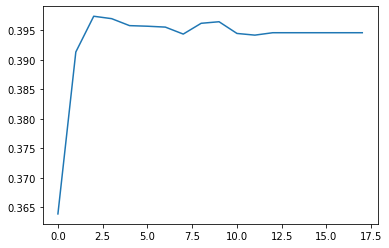

In [ ]:

from sklearn.decomposition import PCA
recs = []
for i in range(2,20):
  X1 = X[:]
  pca = PCA(n_components=i)
  pca.fit(X1)
  X1 = pca.transform(X1)
  recs.append(score_classifier(X1,SVC(),labels)[1])

plt.plot(recs)


X1 = X[:]
pca = PCA(n_components=8)
pca.fit(X1)
X1 = pca.transform(X1)
X1 = MinMaxScaler().fit_transform(X1)

In [ ]:
svc_clf = SVC(C=0.5, kernel='poly', gamma=1, coef0=1.0, tol=0.001, cache_size=10, max_iter=- 1, decision_function_shape='ovo', random_state=None)
score_classifier(X1,svc_clf,labels)

(array([[266., 243.],
        [153., 678.]]), 0.3945490531602798)

## Aproche 2 : combinaison des algorithmes 


In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('svc', svc_clf),('sgd', sgd_clf)],voting='hard', weights=[2,1])
score_classifier(X1,voting_clf,labels)

(array([[266., 243.],
        [153., 678.]]), 0.3945490531602798)

# Save model

In [ ]:
import pickle
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(sgd_clf, file)


# Load model

In [ ]:
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
print(pickle_model)


SGDClassifier(alpha=0.001, fit_intercept=False, loss='modified_huber',
              max_iter=100000, penalty='elasticnet')
